In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
### some of the top apps in the us which we use for get the data

app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='ap', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.85it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys=True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 To do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver +40M people, families and teams rely on Any.do to stay organized and get more done. It's a simple and powerful to do list app with built in tasks, reminders, daily planner and calendar - all-in-one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events alwa

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    return title[:sep_index]
  else:
    return

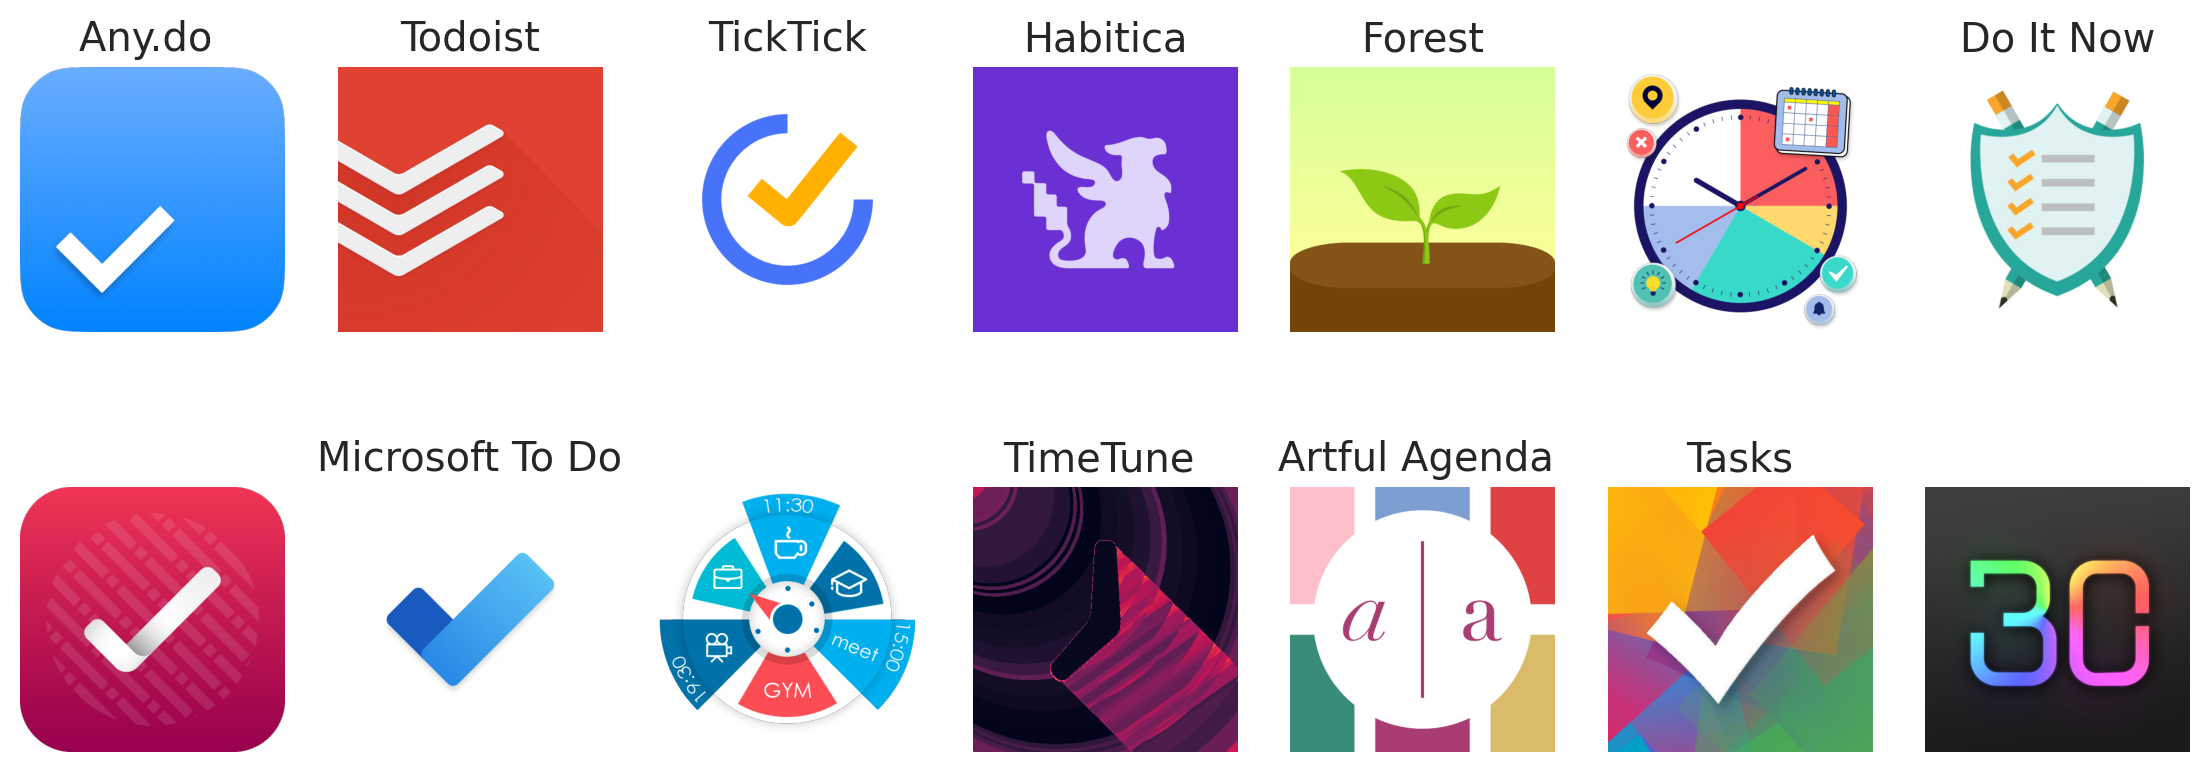

In [ ]:
import urllib.request
from PIL import Image
import numpy as np

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    # Open the URL and read the image data using Pillow
    with urllib.request.urlopen(ai['icon']) as url:
        img = Image.open(url)
        # Convert the Pillow image to a NumPy array
        img = np.array(img)
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('app_infos.csv', index=None, header=True)

In [ ]:
app_infos_df.head()

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 To do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 To do list app out there”</b> - ...,"Daily planner with to-do list & tasks, reminde...","10,000,000+",10000000,30637627,4.403704,490336,36050,...,Everyone,None,False,False,"Nov 10, 2011","Dec 3, 2024",1733217827,Varies with device,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: Planner & Calendar,"Trusted by over 42 million people, Todoist is ...","Trusted by over 42 million people, Todoist is ...","Simple yet powerful to do list, habit tracker ...","10,000,000+",10000000,42557325,4.447369,273673,16166,...,Everyone,None,False,False,"Nov 18, 2012","Dec 12, 2024",1733991957,Varies with device,com.todoist,https://play.google.com/store/apps/details?id=...
2,TickTick:To Do List & Calendar,🥇 Great to-do list app for new Android device ...,🥇 Great to-do list app for new Android device ...,Your second brain for organizing your life: to...,"5,000,000+",5000000,7884278,4.616887,137376,7154,...,Everyone,None,False,False,"Jun 19, 2013","Dec 12, 2024",1733999957,Varies with device,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Habitica is a free habit-building and producti...,Habitica is a free habit-building and producti...,Treat your life like a game to stay motivated ...,"5,000,000+",5000000,6058004,4.733044,56851,3435,...,Everyone,None,True,True,"Dec 10, 2015","Dec 3, 2024",1733235601,Varies with device,com.habitrpg.android.habitica,https://play.google.com/store/apps/details?id=...
4,Forest: Focus for Productivity,Can't stop scrolling? Lack of self-control? Fo...,Can&#39;t stop scrolling? Lack of self-control...,Stay focused on your goal or to dos and get mo...,"10,000,000+",10000000,38590256,4.615769,723026,9354,...,Everyone,None,True,True,"Aug 25, 2014","Nov 21, 2024",1732191727,4.81.0,cc.forestapp,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.shape

(15, 44)

In [ ]:
### get 200 for score 3 and 100 for other scores for the programs reviews

app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
          ap,
          lang='en',
          country='us',
          sort=sort_order,
          count= 200 if score == 3 else 100,
          filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:43<00:00,  2.88s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "appVersion": "5.18.2.3",
  "at": "2024-08-21 05:13:17",
  "content": "The new update is terrible. I really dislike the new agenda view. Why would remove the bullet task list from the monthly view on the mobile format? For me, the simplicity of design, logical functionality, and visual appeal set anydo apart from the others. I don't know that I will continue to use it. I wish I could uninstall the update.",
  "repliedAt": "2024-08-23 05:37:55",
  "replyContent": "If you're referring to the monthly spread, you can still see it in your Calendar View by simply tapping the drop down icon next to the month's title as explained right here: https://support.any.do/en/articles/8610677-navigating-through-the-calendar-views#h_c7b272a071 . For assistance, please reach out via https://www.any.do/contact_form\n",
  "reviewCreatedVersion": "5.18.2.3",
  "reviewId": "06cd8540-20e4-4e00-8feb-43aa510a6075",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 9,
 

In [ ]:
len(app_reviews)

17700

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('app_reviews.csv', index=None, header=True)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,06cd8540-20e4-4e00-8feb-43aa510a6075,jenny selby,https://play-lh.googleusercontent.com/a/ACg8oc...,The new update is terrible. I really dislike t...,1,9,5.18.2.3,2024-08-21 05:13:17,"If you're referring to the monthly spread, you...",2024-08-23 05:37:55,5.18.2.3,most_relevant,com.anydo
1,6e865ed7-6788-49cf-9810-0541068e3882,Gianna,https://play-lh.googleusercontent.com/a-/ALV-U...,The 'upgrade to premium' button is right in th...,1,14,5.18.0.2,2024-07-13 22:25:37,You can dismiss the premium option and keep us...,2024-07-14 08:30:22,5.18.0.2,most_relevant,com.anydo
2,a7205dc0-c76e-4124-810f-38cfa482655a,Andrew Poretz,https://play-lh.googleusercontent.com/a-/ALV-U...,I had this app for years - rarely used it. Tod...,1,5,5.17.0.68,2024-08-26 15:24:11,"Just like many similar apps, Any.do collaborat...",2024-08-27 07:12:46,5.17.0.68,most_relevant,com.anydo
3,35840ddf-082c-4736-bdbc-66981c732974,Tuukka Rinkinen,https://play-lh.googleusercontent.com/a-/ALV-U...,Shows tasks assigned to others in widget. A ma...,1,1,5.6.0.6,2020-10-13 22:02:58,Please note that the display of the Android wi...,2020-10-14 08:28:23,5.6.0.6,most_relevant,com.anydo
4,6446c87d-e045-4325-b154-042cde863d74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Smart Grocery List From Hell. While it might b...,1,20,4.12.0.5,2019-01-17 00:09:23,Please note that you can turn off the smart li...,2019-01-30 15:18:23,4.12.0.5,most_relevant,com.anydo


In [ ]:
#### do the sentiment analysis

!pip install -qq transformers

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17700 entries, 0 to 17699
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              17700 non-null  object        
 1   userName              17700 non-null  object        
 2   userImage             17700 non-null  object        
 3   content               17700 non-null  object        
 4   score                 17700 non-null  int64         
 5   thumbsUpCount         17700 non-null  int64         
 6   reviewCreatedVersion  15098 non-null  object        
 7   at                    17700 non-null  datetime64[ns]
 8   replyContent          9370 non-null   object        
 9   repliedAt             9370 non-null   datetime64[ns]
 10  appVersion            15098 non-null  object        
 11  sortOrder             17700 non-null  object        
 12  appId                 17700 non-null  object        
dtypes: datetime64[ns

In [ ]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

app_reviews_df['sentiment'] = app_reviews_df.score.apply(to_sentiment)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

app_reviews_df.sentiment

,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
17695,2
17696,2
17697,2
17698,2


In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
sample_text = "i was hungary and alone. what should i done?"

tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'Sentence: {sample_text}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Sentence: i was hungary and alone. what should i done?
Tokens: ['i', 'was', 'hung', '##ary', 'and', 'alone', '.', 'what', 'should', 'i', 'done', '?']
Token IDs: [178, 1108, 4629, 3113, 1105, 2041, 119, 1184, 1431, 178, 1694, 136]


In [ ]:
encoding = tokenizer.encode_plus(
    sample_text,
    max_length=32,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt'
)
# Print the keys of the encoding dictionary
print(encoding.keys())

# Access the shapes of the input_ids and attention_mask tensors
print(encoding['input_ids'].shape, encoding['attention_mask'].shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])
torch.Size([1, 32]) torch.Size([1, 32])


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
encoding['input_ids'][0]

tensor([ 101,  178, 1108, 4629, 3113, 1105, 2041,  119, 1184, 1431,  178, 1694,
         136,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
print(len(encoding['attention_mask'][0]))

32


In [ ]:
encoding['attention_mask']


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'i',
 'was',
 'hung',
 '##ary',
 'and',
 'alone',
 '.',
 'what',
 'should',
 'i',
 'done',
 '?',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [ ]:
token_lens = []

for txt in app_reviews_df.content:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

<ipython-input-30-81c22bfc48c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


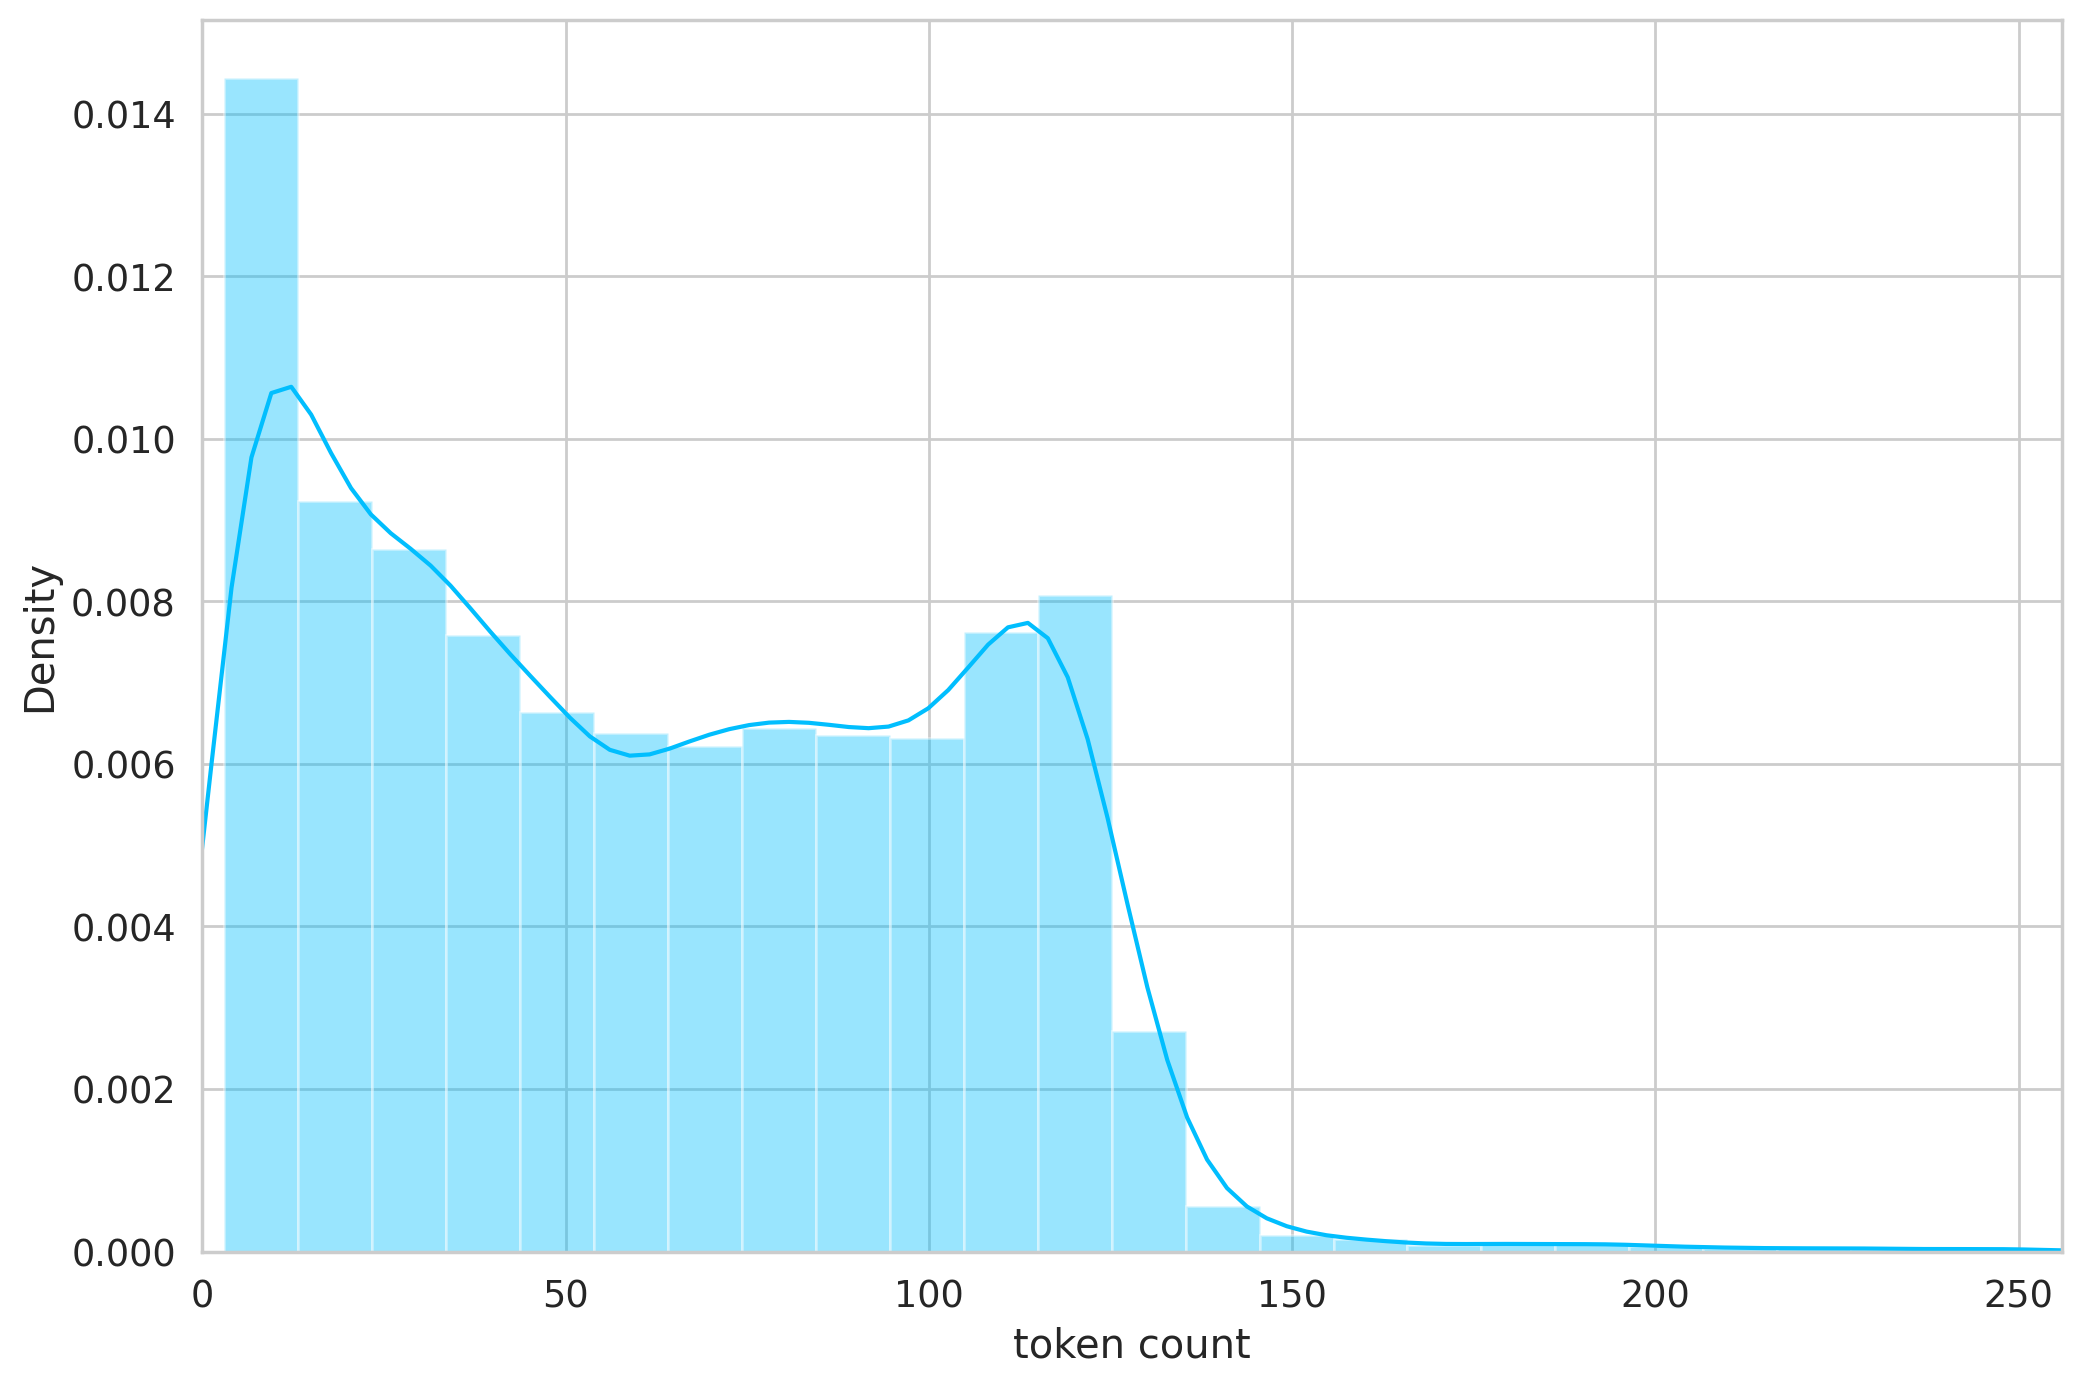

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('token count');

In [ ]:
### as the most of the reviews have less than the 130 tokens we chose 160 to be sure
MAX_LEN = 160

class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
        'review_text':review,
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(
    app_reviews_df,
    test_size=0.1,
    random_state=RANDOM_SEED
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.5,
    random_state=RANDOM_SEED
)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((15930, 14), (885, 14), (885, 14))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.content.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len)
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4)

In [ ]:
bs = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, bs)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, bs)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, bs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [ ]:
data

{'review_text': ['I really like the app but when i make 2 routine on, the next day the other routine schedules are erased idl why',
  "I'm new to myTask app, and I'm learning as lifetime premium member. So, 3 stars for now. I need to change Email or Google Account ASAP. How can I do that please? I sent email a while ago...",
  'Unusable without signing up for an overpriced subscription. SOFTWARE IS NOT A SERVICE AND I WILL NOT RENT IT FROM YOU! False advertising from developer who claims this can be used for free. Yeah, for SEVEN DAYS before you autobill. I\'d have paid a one time fee, but I\'m not paying you monthly for something you can stop development on at any time while still billing me! EDIT: Received spam email from "Roy" on a "no-reply" email. There is no legit reason for a company to use that type of email. 🙄',
  "The tasks don't match well with the days in portrait mode. It does better in landscape mode.",
  'Very slow at registering inputs',
  "I've been using this app for 

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
last_hidden_state, pooled_output = bert_model(
    input_ids=encoding['input_ids'],
    attention_mask=encoding['attention_mask'],
    return_dict=False  # This line is added
)

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
pooled_output.shape

torch.Size([1, 768])

In [ ]:
class_names = ['negative', 'neutral', 'positive']

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape)
print(attention_mask.shape)

torch.Size([16, 160])
torch.Size([16, 160])


In [ ]:
import torch.nn.functional as F # import the necessary module

F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.1636, 0.1808, 0.6555],
        [0.1618, 0.2742, 0.5640],
        [0.2082, 0.3187, 0.4731],
        [0.1749, 0.2174, 0.6078],
        [0.3225, 0.3250, 0.3525],
        [0.3129, 0.2502, 0.4370],
        [0.2282, 0.2940, 0.4778],
        [0.2196, 0.3842, 0.3962],
        [0.3065, 0.2432, 0.4503],
        [0.2339, 0.2314, 0.5348],
        [0.1854, 0.2415, 0.5731],
        [0.3349, 0.2912, 0.3738],
        [0.2162, 0.2948, 0.4890],
        [0.2274, 0.4203, 0.3523],
        [0.1643, 0.3165, 0.5192],
        [0.2960, 0.2139, 0.4900]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
EPOCHS = 3

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_epoch(
    model,
    data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(input_ids=input_ids, attention_mask=attention_mask)

      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Train loss 0.7515284936560924


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Val   loss 0.648861942014524

Epoch 2/3


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Train loss 0.4889568610969617


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Val   loss 0.5947699131710189

Epoch 3/3


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Train loss 0.3206075104608025


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Val   loss 0.7002829124352762

CPU times: user 13min 22s, sys: 6min 35s, total: 19min 57s
Wall time: 20min 49s


In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/py

0.7728813559322034

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()

  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:
      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu() # Added parentheses here
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)
print(classification_report(y_test, y_pred, target_names=class_names))

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

              precision    recall  f1-score   support

    negative       0.80      0.79      0.79       286
     neutral       0.68      0.72      0.70       297
    positive       0.85      0.81      0.83       302

    accuracy                           0.77       885
   macro avg       0.78      0.77      0.77       885
weighted avg       0.78      0.77      0.77       885



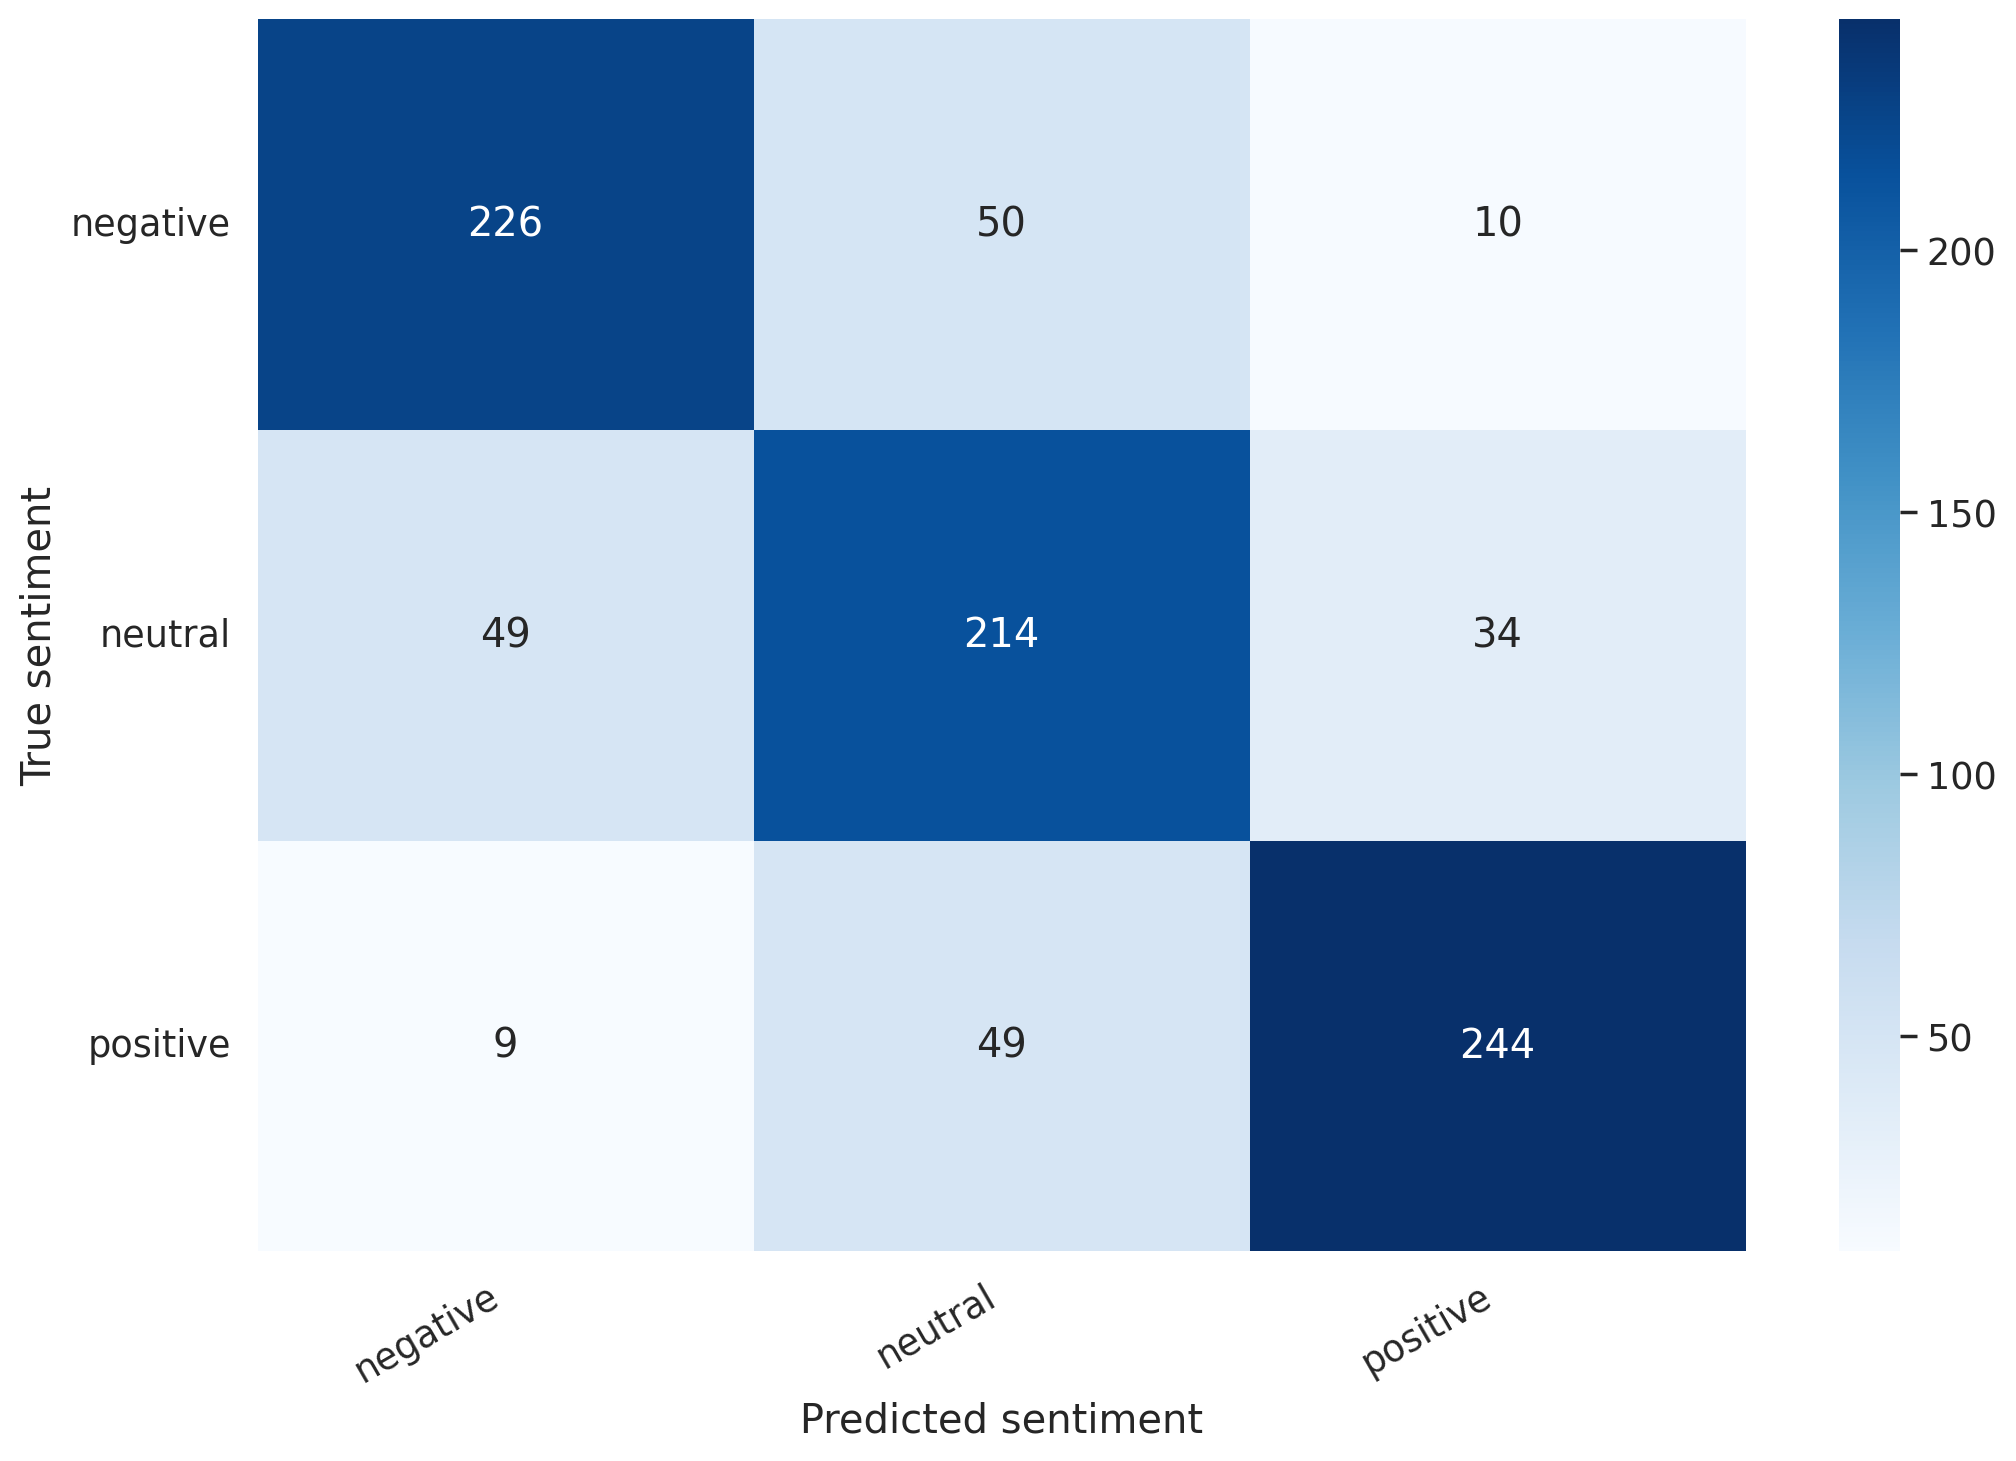

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
idx = 2
review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

print(f'Review text:\n{review_text}')
print(f'True sentiment: {class_names[true_sentiment]}')
print(f'Predicted sentiment')

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1])
plt.tight_layout()
plt.show()

In [ ]:
#### predictions on raw text

review_text = "I hated this movie. The acting sucked. The dialogue was slow."

encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')